### 온열질환자 범주별 예측
#### - 1-dimensional binning
- 밀도 기반의 binning 진행
#### - 2-dimensional binning
- K-NN을 이용한 clustering 진행
  : 환자수&기온, 환자수&습구온도

In [1]:
import pandas as pd
import numpy as np
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

In [2]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

from keras.models import Sequential
from keras.layers import LSTM, Dense

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

In [3]:
path='D:/Work/002.code/jupyterNotebook/data/HEAT_TARGET/T_PATIENTS_DAILY_WHOLE_0731.csv'
df_raw=pd.read_csv(path)
df_raw.head(2)

,sido,create_date,sido_cd,weekend_yn,grid_x,grid_y,sat_x,sat_y,min_ta,max_ta,...,ta_mean_six_am2,ta_min_six_pm1,ta_max_six_pm1,ta_mean_six_pm1,ta_min_six_pm2,ta_max_six_pm2,ta_mean_six_pm2,patientsCnt,instDate,updtDate
0,경기도,2014-05-01,31,0,60,120,NaN,NaN,9.6,24.2,...,15,21,24,22,14,21,17,0,2024-07-31,2024-07-31
1,충청북도,2014-05-01,33,0,69,107,NaN,NaN,10.5,23.7,...,15,21,23,22,15,22,18,0,2024-07-31,2024-07-31


#### 밀도기반의 patientCnt binning

In [4]:
# 데이터의 밀도에 따라 자동으로 bin을 설정
hist1, bin_edges1 = np.histogram(df_raw['patientsCnt'], bins='auto')

In [5]:
print(hist1)
print(bin_edges1)

[24909   779   199    64    22    22     6     0     1     1     3     0
     2     0     1     1]
[ 0.     4.875  9.75  14.625 19.5   24.375 29.25  34.125 39.    43.875
 48.75  53.625 58.5   63.375 68.25  73.125 78.   ]


In [6]:
count_hist=hist1.tolist()
range_hist=bin_edges1.tolist()

In [7]:
count_hist

[24909, 779, 199, 64, 22, 22, 6, 0, 1, 1, 3, 0, 2, 0, 1, 1]

In [8]:
range_hist

[0.0,
 4.875,
 9.75,
 14.625,
 19.5,
 24.375,
 29.25,
 34.125,
 39.0,
 43.875,
 48.75,
 53.625,
 58.5,
 63.375,
 68.25,
 73.125,
 78.0]

##### 0을 제외한 clustering

- max_ta case

In [9]:
from sklearn.cluster import KMeans

In [10]:
list=['create_date', 'sido_cd', 'max_ta', 'patientsCnt']
df_max_ta = df_raw[list]
# 0을 제외한 값들로 clustering 진행
df_max_ta = df_max_ta[df_max_ta['patientsCnt']!=0]
df_max_ta

# 6036개에 대한 clustering 수행
# KMeans 모델 초기화 및 학습
k=3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_max_ta['max_ta_cluster'] = kmeans.fit_predict(df_max_ta[['max_ta', 'patientsCnt']]) + 1

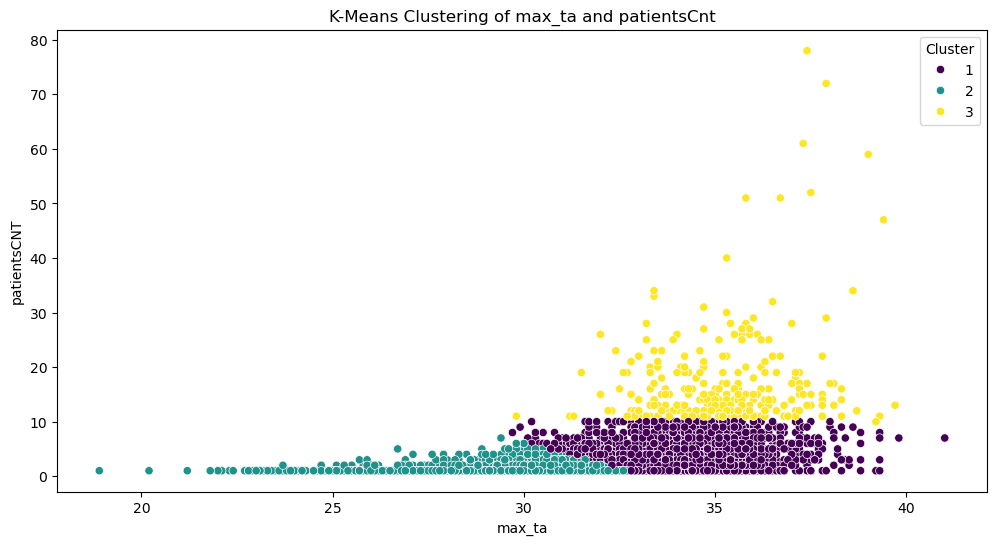

In [11]:
# 클러스터링 결과 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(x='max_ta', y='patientsCnt', hue='max_ta_cluster', data=df_max_ta, palette='viridis')
plt.title('K-Means Clustering of max_ta and patientsCnt')
plt.xlabel('max_ta')
plt.ylabel('patientsCNT')
plt.legend(title='Cluster')
plt.show()

- max_wbtemp case

In [12]:
list=['create_date', 'sido_cd', 'max_wbtemp', 'patientsCnt']
df_max_wbtemp = df_raw[list]
# 0을 제외한 값들로 clustering 진행
df_max_wbtemp = df_max_wbtemp[df_max_wbtemp['patientsCnt']!=0]
df_max_wbtemp

# 6036개에 대한 clustering 수행
# KMeans 모델 초기화 및 학습
k=3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_max_wbtemp['max_wbtemp_cluster'] = kmeans.fit_predict(df_max_wbtemp[['max_wbtemp', 'patientsCnt']]) + 1

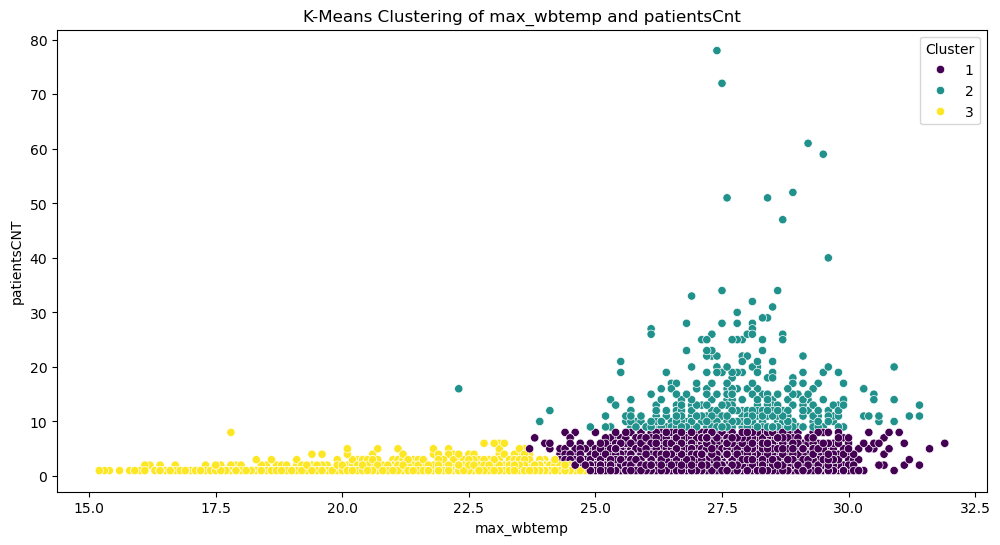

In [13]:
# 클러스터링 결과 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(x='max_wbtemp', y='patientsCnt', hue='max_wbtemp_cluster', data=df_max_wbtemp, palette='viridis')
plt.title('K-Means Clustering of max_wbtemp and patientsCnt')
plt.xlabel('max_wbtemp')
plt.ylabel('patientsCNT')
plt.legend(title='Cluster')
plt.show()

- max_tafeel case

In [14]:
list=['create_date', 'sido_cd', 'max_tafeel', 'patientsCnt']
df_max_tafeel = df_raw[list]
# 0을 제외한 값들로 clustering 진행
df_max_tafeel = df_max_tafeel[df_max_tafeel['patientsCnt']!=0]
df_max_tafeel

# 6036개에 대한 clustering 수행
# KMeans 모델 초기화 및 학습
k=3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_max_tafeel['max_tafeel_cluster'] = kmeans.fit_predict(df_max_tafeel[['max_tafeel', 'patientsCnt']]) + 1 

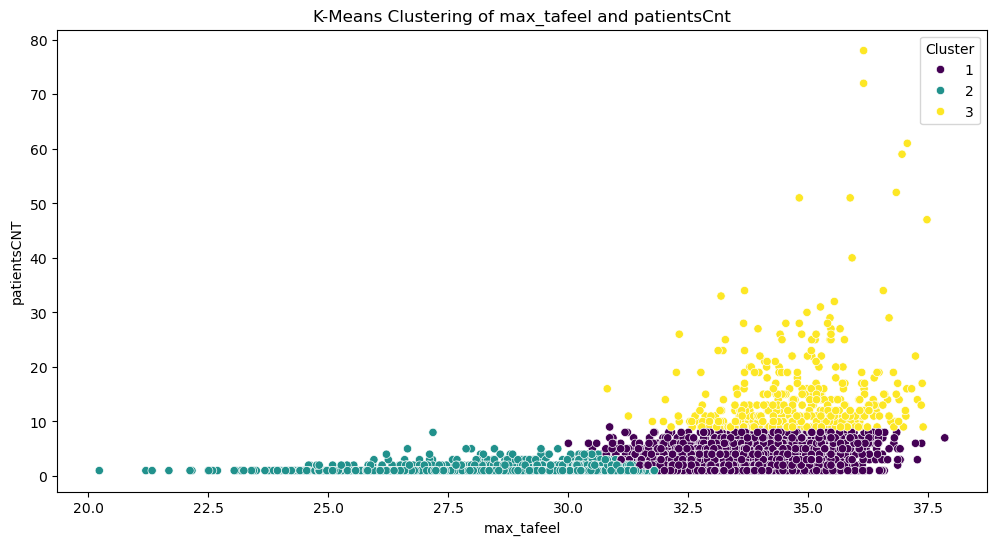

In [15]:
# 클러스터링 결과 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(x='max_tafeel', y='patientsCnt', hue='max_tafeel_cluster', data=df_max_tafeel, palette='viridis')
plt.title('K-Means Clustering of max_tafeel and patientsCnt')
plt.xlabel('max_tafeel')
plt.ylabel('patientsCNT')
plt.legend(title='Cluster')
plt.show()

In [16]:
df_max_ta.head(2)

,create_date,sido_cd,max_ta,patientsCnt,max_ta_cluster
500,2014-05-30,11,31.8,1,2
510,2014-05-31,31,34.0,1,1


In [17]:
df_max_wbtemp.head(2)

,create_date,sido_cd,max_wbtemp,patientsCnt,max_wbtemp_cluster
500,2014-05-30,11,19.4,1,3
510,2014-05-31,31,21.4,1,3


In [18]:
df_max_tafeel.head(2)

,create_date,sido_cd,max_tafeel,patientsCnt,max_tafeel_cluster
500,2014-05-30,11,28.83,1,2
510,2014-05-31,31,31.10,1,2


In [19]:
df_merged = df_max_ta.join(df_max_wbtemp, how='inner', lsuffix='_ta', rsuffix='_wbtemp')
df_merged = df_merged.join(df_max_tafeel, how='inner', lsuffix='_combined', rsuffix='_tafeel')

In [20]:
df_merged

,create_date_ta,sido_cd_ta,max_ta,patientsCnt_ta,max_ta_cluster,create_date_wbtemp,sido_cd_wbtemp,max_wbtemp,patientsCnt_wbtemp,max_wbtemp_cluster,create_date,sido_cd,max_tafeel,patientsCnt,max_tafeel_cluster
500,2014-05-30,11,31.8,1,2,2014-05-30,11,19.4,1,3,2014-05-30,11,28.83,1,2
510,2014-05-31,31,34.0,1,1,2014-05-31,31,21.4,1,3,2014-05-31,31,31.10,1,2
513,2014-05-31,35,34.6,1,1,2014-05-31,35,21.9,1,3,2014-05-31,35,30.76,1,2
524,2014-05-31,26,32.3,1,2,2014-05-31,26,20.6,1,3,2014-05-31,26,29.46,1,2
525,2014-05-31,38,34.9,1,1,2014-05-31,38,23.1,1,3,2014-05-31,38,31.04,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25812,2023-09-19,36,29.7,1,2,2023-09-19,36,23.8,1,3,2023-09-19,36,29.88,1,2
25820,2023-09-19,26,29.9,1,2,2023-09-19,26,23.7,1,3,2023-09-19,26,30.26,1,2
25829,2023-09-20,36,28.8,2,2,2023-09-20,36,26.1,2,1,2023-09-20,36,30.55,2,2
25874,2023-09-23,31,26.5,1,2,2023-09-23,31,20.2,1,3,2023-09-23,31,26.37,1,2


In [21]:
lst=['create_date_ta', 'sido_cd_ta', 'max_ta', 'max_wbtemp', 'max_tafeel' , 'max_ta_cluster', 'max_wbtemp_cluster', 'max_tafeel_cluster']
df_cluster_merge=df_merged[lst]
df_cluster_merge = df_cluster_merge.rename(columns={'create_date_ta': 'create_date', 'sido_cd_ta': 'sido_cd'})

In [22]:
df_cluster_merge.head(5)

,create_date,sido_cd,max_ta,max_wbtemp,max_tafeel,max_ta_cluster,max_wbtemp_cluster,max_tafeel_cluster
500,2014-05-30,11,31.8,19.4,28.83,2,3,2
510,2014-05-31,31,34.0,21.4,31.10,1,3,2
513,2014-05-31,35,34.6,21.9,30.76,1,3,2
524,2014-05-31,26,32.3,20.6,29.46,2,3,2
525,2014-05-31,38,34.9,23.1,31.04,1,3,2


In [23]:
# df_cluster_merge.to_csv('knn_clustering.csv', index=False)

In [24]:
df_raw['auto_binning']=0
df_raw['max_ta_cluster']=0
df_raw['max_wbtemp_cluster']=0
df_raw['max_tafeel_cluster']=0

In [25]:
df_raw.columns
lst=['sido', 'create_date', 'sido_cd', 'weekend_yn', 'grid_x', 'grid_y', 'sat_x', 'sat_y', 'min_ta', 'max_ta', 'mean_ta', 'gap_ta', 'min_tafeel', 'max_tafeel', 'mean_tafeel', 'gap_tafeel', 'min_hm', 'max_hm', 'mean_hm', 'gap_hm', 'min_wbtemp', 'max_wbtemp', 'mean_wbtemp',
    'gap_wbtemp', 'min_ws', 'max_ws', 'mean_ws', 'tropical_3days', 'heatwave_temp', 'heatalert_temp', 'ta_min_3days', 'ta_max_3days', 'gap_ta_minmax', 'popular_man', 'popular_woman', 'agriculture_man', 'agriculture_woman', 'ta_min_am', 'ta_max_am', 'ta_mean_am',
    'ta_min_pm', 'ta_max_pm', 'ta_mean_pm', 'ta_min_six_am1', 'ta_max_six_am1', 'ta_mean_six_am1', 'ta_min_six_am2', 'ta_max_six_am2','ta_mean_six_am2', 'ta_min_six_pm1', 'ta_max_six_pm1', 'ta_mean_six_pm1', 'ta_min_six_pm2', 'ta_max_six_pm2',
    'ta_mean_six_pm2', 'patientsCnt','auto_binning', 'max_ta_cluster', 'max_wbtemp_cluster', 'max_tafeel_cluster', 'instDate', 'updtDate']

In [26]:
df_clustering_set=df_raw[lst]
df_clustering_set.fillna(value='NA', inplace=True)

In [27]:
print(df_clustering_set.shape)
print(df_cluster_merge.shape)

(26010, 62)
(6036, 8)


In [28]:
# 데이터프레임을 인덱스 설정
df_clustering_set.set_index(['create_date', 'sido_cd'], inplace=True)
df_cluster_merge.set_index(['create_date', 'sido_cd'], inplace=True)

In [29]:
df_clustering_set.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26010 entries, ('2014-05-01', 31) to ('2023-09-30', 23)
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sido                26010 non-null  object 
 1   weekend_yn          26010 non-null  int64  
 2   grid_x              26010 non-null  int64  
 3   grid_y              26010 non-null  int64  
 4   sat_x               26010 non-null  object 
 5   sat_y               26010 non-null  object 
 6   min_ta              26010 non-null  float64
 7   max_ta              26010 non-null  float64
 8   mean_ta             26010 non-null  float64
 9   gap_ta              26010 non-null  float64
 10  min_tafeel          26010 non-null  float64
 11  max_tafeel          26010 non-null  float64
 12  mean_tafeel         26010 non-null  float64
 13  gap_tafeel          26010 non-null  float64
 14  min_hm              26010 non-null  float64
 15  max_hm              260

In [30]:
# 업데이트할 열 목록
columns_to_update = ['max_ta_cluster', 'max_wbtemp_cluster', 'max_tafeel_cluster']

# df2의 값으로 df1 업데이트
df_clustering_set.update(df_cluster_merge[columns_to_update])
# 데이터프레임의 데이터 타입 확인 및 변환 (필요시)
df_clustering_set = df_clustering_set.astype(str)

In [32]:
df_clustering_set

sido weekend_yn grid_x grid_y sat_x sat_y min_ta  \
create_date sido_cd                                                        
2014-05-01  31           경기도          0     60    120    NA    NA    9.6   
            33          충청북도          0     69    107    NA    NA   10.5   
            22         대구광역시          0     89     90    NA    NA   13.5   
            35       전북특별자치도          0     63     89    NA    NA   10.2   
            37          경상북도          0     89     91    NA    NA   13.3   
...                      ...        ...    ...    ...   ...   ...    ...   
2023-09-30  21         부산광역시          1     98     76    NA    NA   16.8   
            24         광주광역시          1     58     74    NA    NA   15.2   
            26         울산광역시          1    102     84    NA    NA   15.5   
            38          경상남도          1     91     77    NA    NA   18.3   
            23         인천광역시          1     55    124    NA    NA   18.9   

                    max_ta mean_ta gap_ta  ... ta_min_six_pm2 ta_max_six_pm2  \
create_date sido_cd                        ...                                 
2014-05-01  31        24.2    16.6   14.6  ...             14             21   
            33        23.7    17.1   13.2  ...             15             22   
            22        25.3    19.0   11.8  ...             18             24   
            35        23.6    16.2   13.4  ...             12             21   
            37        25.3    19.3   12.0  ...             19             24   
...                    ...     ...    ...  ...            ...            ...   
2023-09-30  21        22.7    20.5    5.9  ...             19             20   
            24        23.6    19.3    8.4  ...             19             21   
            26        24.1    19.6    8.6  ...             18             21   
            38        25.5    21.5    7.2  ...             18             22   
            23        23.3    21.5    4.4  ...             18             21   

                    ta_mean_six_pm2 patientsCnt auto_binning max_ta_cluster  \
create_date sido_cd                                                           
2014-05-01  31                   17           0            0              0   
            33                   18           0            0              0   
            22                   20           0            0              0   
            35                   16           0            0              0   
            37                   21           0            0              0   
...                             ...         ...          ...            ...   
2023-09-30  21                   20           0            0              0   
            24                   19           0            0              0   
            26                   19           0            0              0   
            38                   19           0            0              0   
            23                   20           0            0              0   

                    max_wbtemp_cluster max_tafeel_cluster    instDate  \
create_date sido_cd                                                     
2014-05-01  31                       0                  0  2024-07-31   
            33                       0                  0  2024-07-31   
            22                       0                  0  2024-07-31   
            35                       0                  0  2024-07-31   
            37                       0                  0  2024-07-31   
...                                ...                ...         ...   
2023-09-30  21                       0                  0  2024-07-31   
            24                       0                  0  2024-07-31   
            26                       0                  0  2024-07-31   
            38                       0                  0  2024-07-31   
            23                       0                  0  2024-07-31   

                

In [35]:
# df_clustering_set.to_csv('D:/Work/002.code/jupyterNotebook/data/HEAT_TARGET/T_PATIENTS_DAILY_WHOLE_CLUSTERING_0808.csv', encoding='utf-8-sig')